### ENSIMAG – Grenoble INP – UGA - Academic year 2025-2026
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2026-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Isabella Costa Maia -- `isabella.costa-maia@grenoble-inp.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.

## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [1]:
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")

df = df.drop(columns=[df.columns[0], df.columns[-1]])

**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.

``` 
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()
```

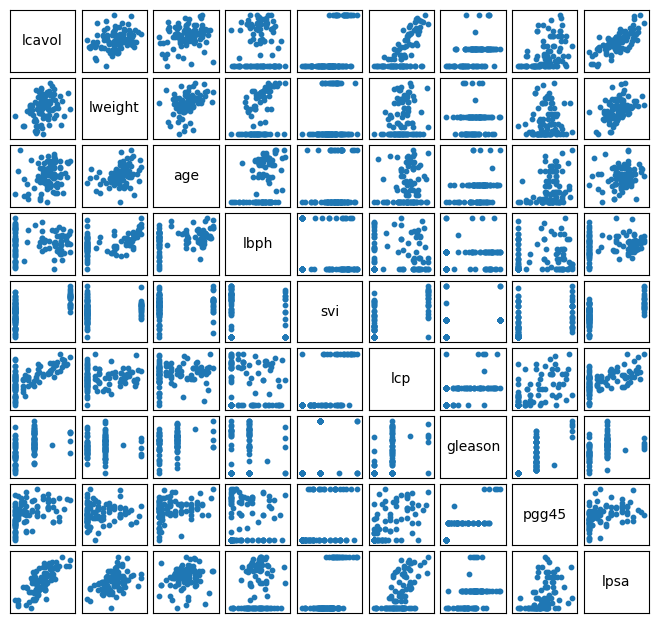

In [2]:
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()

**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each of the predictors.

**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

In [3]:
import numpy as np

def correlation(X, Y):
    cov = np.mean((X - np.mean(X)) * (Y - np.mean(Y)))
    return cov / (np.std(X) * np.std(Y))

for col in df.columns:
    print(f"Correlation between lcavol and {col}:\n   using numpy: {correlation(df['lcavol'], df[col])},\n   using df.corr: {df['lcavol'].corr(df[col])}\n")

Correlation between lcavol and lcavol:
   using numpy: 1.0,
   using df.corr: 1.0

Correlation between lcavol and lweight:
   using numpy: 0.28052138000983295,
   using df.corr: 0.2805213800098328

Correlation between lcavol and age:
   using numpy: 0.22499987914993153,
   using df.corr: 0.22499987914993153

Correlation between lcavol and lbph:
   using numpy: 0.027349703303625298,
   using df.corr: 0.027349703303625354

Correlation between lcavol and svi:
   using numpy: 0.5388450022638601,
   using df.corr: 0.5388450022638602

Correlation between lcavol and lcp:
   using numpy: 0.6753104840558688,
   using df.corr: 0.6753104840558688

Correlation between lcavol and gleason:
   using numpy: 0.4324170558258538,
   using df.corr: 0.43241705582585366

Correlation between lcavol and pgg45:
   using numpy: 0.4336522490280904,
   using df.corr: 0.43365224902809046

Correlation between lcavol and lpsa:
   using numpy: 0.734460326213673,
   using df.corr: 0.734460326213673



/home/benjamin-guy/Cours/ASA/.venv/lib/python3.12/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


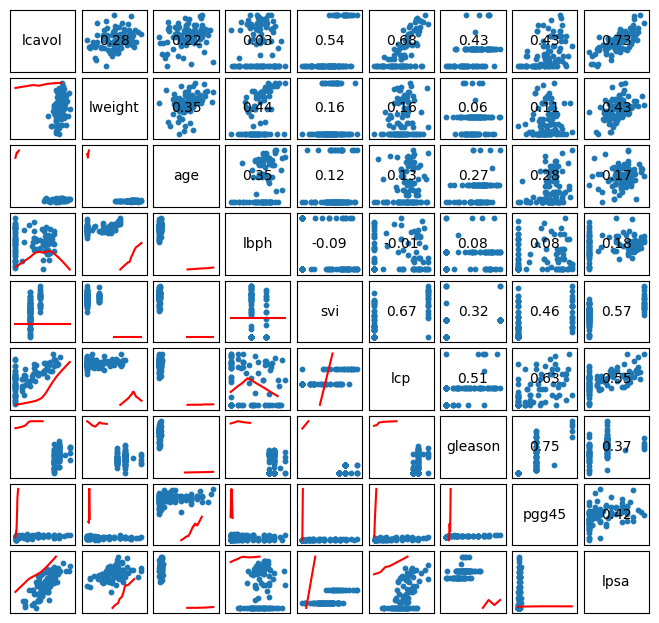

In [4]:
from statsmodels.nonparametric.smoothers_lowess import lowess

def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
                if i < j:
                    corr = correlation(df[i_name], df[j_name]) # or df[i_name].corr(df[j_name]) to get the exact same result
                    axij.text(0.5, 0.5, f"{corr:.2f}", fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)
                else:
                    smoothed = lowess(df[i_name], df[j_name], frac=0.6)
                    axij.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=1.5)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with

```
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
```

**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters. 

In [5]:
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")

**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:

```
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
```

- Why did we fix a `dtype` in `pd.get_dummies`?
- Why did we drop two columns after the encoding?
- Why did we add a column of ones to the dataframe?

In [6]:
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']

**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:

```
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
```

Use command `results.sumary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`. 

- What would have happened in the regression if we did not do the one-hot encoding from above?

- Comment the overall results of the regression as well.

In [7]:
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Sun, 22 Feb 2026   Prob (F-statistic):           9.05e-18
Time:                        20:16:07   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.958      -0.432       0.409
age            0.0248      0.011      2.205      0.030       0.002       0.047
lbph          -0.1042      0.058     -1.790      0.077      -0.220       0.012
lcp            0.4028      0.085      4.734      0.000       0.234       0.572
pgg45         -0.0094      0.005     -2.080      0.040      -0.018      -0.000
lpsa           0.5496      0.090      6.100      0.000       0.370       0.729
svi_1         -0.2204      0.256     -0.860      0.392      -0.730       0.289
gleason_7      0.3117      0.215      1.448      0.151      -0.116       0.740
gleason_8     -0.7106      0.759     -0.936      0.352      -2.219       0.798
gleason_9      0.7901      0.488      1.621      0.109      -0.179       1.759
intercept     -1.4067      0.874     -1.609      0.111      -3.145       0.332
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.127
Skew:                          -0.073   Prob(JB):                        0.939
Kurtosis:                       2.900   Cond. No.                         884.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

In [8]:
results.conf_int()

,0,1
lweight,-0.431600,0.409107
age,0.002436,0.047129
lbph,-0.219914,0.011515
lcp,0.233639,0.571880
pgg45,-0.018469,-0.000419
lpsa,0.370474,0.728673
svi_1,-0.730029,0.289190
gleason_7,-0.116263,0.739616
gleason_8,-2.219087,0.797911
gleason_9,-0.179004,1.759273


**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.

In [9]:
results.pvalues

lweight      9.577075e-01
age          3.014993e-02
lbph         7.695609e-02
lcp          8.577858e-06
pgg45        4.047741e-02
lpsa         2.939241e-08
svi_1        3.922717e-01
gleason_7    1.512950e-01
gleason_8    3.516744e-01
gleason_9    1.087313e-01
intercept    1.113676e-01
dtype: float64

**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

In [10]:
from scipy import stats

def ols_fit(X, y):
    n, p = X.shape

    # Beta estimate : (X^T X)^{-1} X^T y
    XtX = X.T @ X
    Xty = X.T @ y
    beta = np.linalg.solve(XtX, Xty)

    # Residuals and variance estimate
    y_hat = X @ beta
    residuals = y - y_hat
    sigma2 = (residuals @ residuals) / (n - p) # unbiased estimator for s^2

    # Covariance matrix of beta, standard errors, t-stats
    cov_beta = sigma2 * np.linalg.solve(XtX, np.eye(p))
    se = np.sqrt(np.diag(cov_beta))
    t_stats = beta / se

    # p-values from t-distribution with (n-p) degrees of freedom
    p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df=n - p))

    return beta, p_values

beta, p_values = ols_fit(X, y)

comparison = pd.DataFrame({
    'coef (ours)':    beta,
    'coef (statsmodels)': results.params.values,
    'p-value (ours)': p_values,
    'p-value (statsmodels)': results.pvalues.values
}, index=results.params.index)

print(comparison)

           coef (ours)  coef (statsmodels)  p-value (ours)  \
lweight      -0.011246           -0.011246    9.577075e-01   
age           0.024782            0.024782    3.014993e-02   
lbph         -0.104200           -0.104200    7.695609e-02   
lcp           0.402760            0.402760    8.577858e-06   
pgg45        -0.009444           -0.009444    4.047741e-02   
lpsa          0.549573            0.549573    2.939241e-08   
svi_1        -0.220419           -0.220419    3.922717e-01   
gleason_7     0.311676            0.311676    1.512950e-01   
gleason_8    -0.710588           -0.710588    3.516744e-01   
gleason_9     0.790135            0.790135    1.087313e-01   
intercept    -1.406654           -1.406654    1.113676e-01   

           p-value (statsmodels)  
lweight             9.577075e-01  
age                 3.014993e-02  
lbph                7.695609e-02  
lcp                 8.577858e-06  
pgg45               4.047741e-02  
lpsa                2.939241e-08  
svi_1     

**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

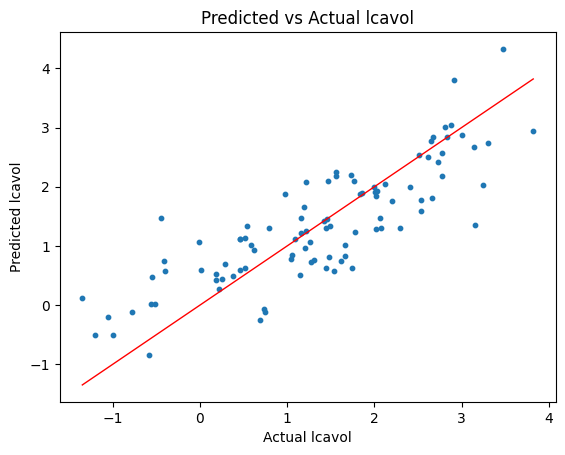

In [11]:
predicted = results.get_prediction().predicted_mean

plt.scatter(y, predicted, s=10)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=1)  # perfect prediction line
plt.xlabel('Actual lcavol')
plt.ylabel('Predicted lcavol')
plt.title('Predicted vs Actual lcavol')
plt.show()

**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

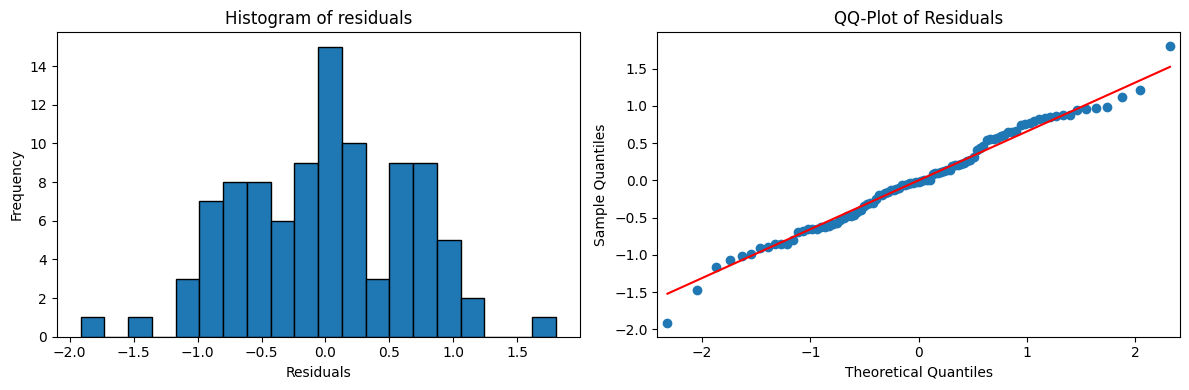

41.81406860804535


In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(results.resid, bins=20, edgecolor='black')
axes[0].set_title('Histogram of residuals')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')

sm.qqplot(results.resid, line='s', ax=axes[1])
axes[1].set_title('QQ-Plot of Residuals')

plt.tight_layout()
plt.show()

RSS = np.sum(results.resid**2)
print(RSS)

**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

In [13]:
X_test = df_enc.drop(columns=['lcavol', 'lpsa', 'lcp'])
model_test = sm.OLS(y, X_test)
results_test = model_test.fit()
results_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     8.390
Date:                Sun, 22 Feb 2026   Prob (F-statistic):           2.11e-08
Time:                        20:16:07   Log-Likelihood:                -125.58
No. Observations:                  97   AIC:                             269.2
Df Residuals:                      88   BIC:                             292.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight        0.5850      0.259      2.257      0.026       0.070       1.100
age            0.0073      0.015      0.497      0.621      -0.022       0.036
lbph          -0.0746      0.077     -0.967      0.336      -0.228       0.079
pgg45         -0.0004      0.006     -0.076      0.939      -0.012       0.011
svi_1          1.0246      0.271      3.774      0.000       0.485       1.564
gleason_7      0.8007      0.274      2.918      0.004       0.255       1.346
gleason_8      0.6869      0.960      0.715      0.476      -1.221       2.595
gleason_9      1.1726      0.644      1.820      0.072      -0.108       2.453
intercept     -1.9717      1.159     -1.701      0.092      -4.275       0.332
==============================================================================
Omnibus:                        0.297   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.473
Skew:                          -0.013   Prob(JB):                        0.789
Kurtosis:                       2.659   Cond. No.                         882.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

In [14]:
from itertools import combinations

RSS = []
for cols in combinations(X.columns, 2):
    model = sm.OLS(y, X[list(cols)])
    results = model.fit()
    print(f"RSS for predictor(s) {cols}: {results.ssr}\n")
    RSS.append((cols, results.ssr))

best = min(RSS, key=lambda x: x[1])
print(f"Best predictors: {best[0]}\nRSS: {best[1]}")

RSS for predictor(s) ('lweight', 'age'): 125.53731539586694

RSS for predictor(s) ('lweight', 'lbph'): 125.48166312017325

RSS for predictor(s) ('lweight', 'lcp'): 68.71557369348874

RSS for predictor(s) ('lweight', 'pgg45'): 103.59007561532249

RSS for predictor(s) ('lweight', 'lpsa'): 61.198750959189404

RSS for predictor(s) ('lweight', 'svi_1'): 90.59172769584455

RSS for predictor(s) ('lweight', 'gleason_7'): 106.0358813893535

RSS for predictor(s) ('lweight', 'gleason_8'): 125.64009016288198

RSS for predictor(s) ('lweight', 'gleason_9'): 122.36922364535239

RSS for predictor(s) ('lweight', 'intercept'): 122.8647121691087

RSS for predictor(s) ('age', 'lbph'): 127.65204041696136

RSS for predictor(s) ('age', 'lcp'): 69.93087086571346

RSS for predictor(s) ('age', 'pgg45'): 106.73663424712312

RSS for predictor(s) ('age', 'lpsa'): 62.950677018950024

RSS for predictor(s) ('age', 'svi_1'): 91.61067948127153

RSS for predictor(s) ('age', 'gleason_7'): 107.79324504959833

RSS for pred

k=0 | Best predictors: () | RSS: 133.3590
k=1 | Best predictors: ('lpsa',) | RSS: 61.4209
k=2 | Best predictors: ('lcp', 'lpsa') | RSS: 47.2781
k=3 | Best predictors: ('age', 'lcp', 'lpsa') | RSS: 46.2378
k=4 | Best predictors: ('age', 'lbph', 'lcp', 'lpsa') | RSS: 44.8784
k=5 | Best predictors: ('age', 'lbph', 'lcp', 'pgg45', 'lpsa') | RSS: 44.3113
k=6 | Best predictors: ('age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_8') | RSS: 43.7760
k=7 | Best predictors: ('age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_7', 'gleason_9') | RSS: 42.4736
k=8 | Best predictors: ('age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_7', 'gleason_8', 'gleason_9') | RSS: 42.1739


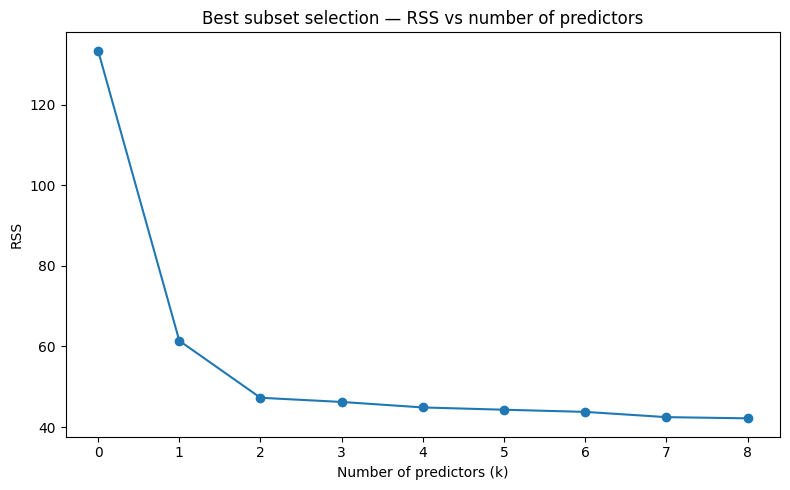

In [15]:
best_per_k = {}

for k in range(0, 9):
    rss_k = []
    for cols in combinations(X.columns, k):
        model = sm.OLS(y, sm.add_constant(X[list(cols)]))
        results = model.fit()
        rss_k.append((cols, results.ssr))
    
    best = min(rss_k, key=lambda x: x[1])
    best_per_k[k] = best
    print(f"k={k} | Best predictors: {best[0]} | RSS: {best[1]:.4f}")

ks = list(best_per_k.keys())
rss_values = [best_per_k[k][1] for k in ks]

plt.figure(figsize=(8, 5))
plt.plot(ks, rss_values, marker='o')
plt.xlabel('Number of predictors (k)')
plt.ylabel('RSS')
plt.title('Best subset selection — RSS vs number of predictors')
plt.xticks(ks)
plt.tight_layout()
plt.show()

## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 

**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.

**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

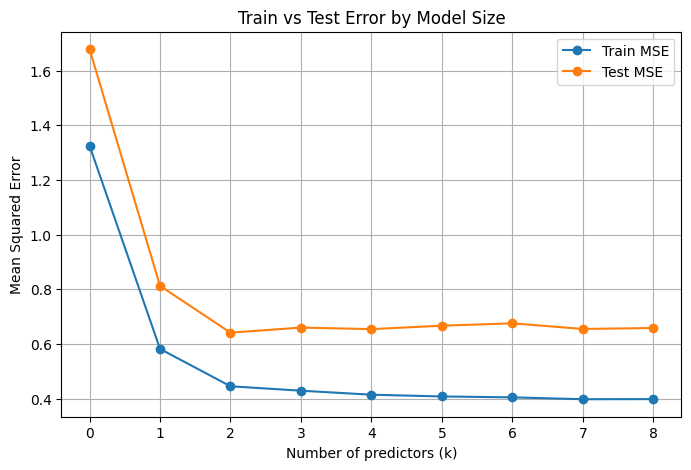

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

best_per_k = {}
for k in range(0, 9):
    rss_k = []
    for cols in combinations(X.columns, k):
        if k == 0:
            model = sm.OLS(y_train, np.ones(len(y_train)))
        else:
            model = sm.OLS(y_train, sm.add_constant(X_train[list(cols)]))
        results = model.fit()
        rss_k.append((cols, results.ssr, results))
    
    best = min(rss_k, key=lambda x: x[1])
    best_per_k[k] = best

# Now compute errors
train_errors = []
test_errors  = []

for k in range(9):
    cols, rss, results = best_per_k[k]
    
    # Training MSE
    train_errors.append(results.mse_resid)
    
    # Test MSE
    if k == 0:
        X_test_k = np.ones(len(y_test))
    else:
        X_test_k = sm.add_constant(X_test[list(cols)])
    
    y_pred_test = results.predict(X_test_k)
    test_errors.append(np.mean((y_test - y_pred_test) ** 2))

plt.figure(figsize=(8, 5))
plt.plot(range(9), train_errors, marker='o', label='Train MSE')
plt.plot(range(9), test_errors,  marker='o', label='Test MSE')
plt.xlabel('Number of predictors (k)')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Test Error by Model Size')
plt.xticks(range(9))
plt.legend()
plt.grid(True)
plt.show()

In [17]:
best_cols = best_per_k[2][0]  # ('lcp', 'lpsa')
model_full = sm.OLS(y, sm.add_constant(X[list(best_cols)])).fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     85.57
Date:                Sun, 22 Feb 2026   Prob (F-statistic):           6.81e-22
Time:                        20:26:37   Log-Likelihood:                -102.78
No. Observations:                  97   AIC:                             211.6
Df Residuals:                      94   BIC:                             219.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0913      0.205      0.445      0.6

In [22]:
for seed in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    
    test_errors = []
    for k in range(9):
        cols, _, _ = best_per_k[k]
        if k == 0:
            y_pred = np.full(len(y_test), y_train.mean())
        else:
            results = sm.OLS(y_train, sm.add_constant(X_train[list(cols)])).fit()
            y_pred = results.predict(sm.add_constant(X_test[list(cols)]))
        test_errors.append(np.mean((y_test - y_pred) ** 2))
    
    best_k = np.argmin(test_errors)
    print(f"Seed {seed} → Best k = {best_k} | Test MSE = {test_errors[best_k]:.4f}")

Seed 0 → Best k = 2 | Test MSE = 0.6077
Seed 1 → Best k = 3 | Test MSE = 0.4464
Seed 2 → Best k = 8 | Test MSE = 0.5816
Seed 3 → Best k = 5 | Test MSE = 0.4976
Seed 4 → Best k = 2 | Test MSE = 0.5467


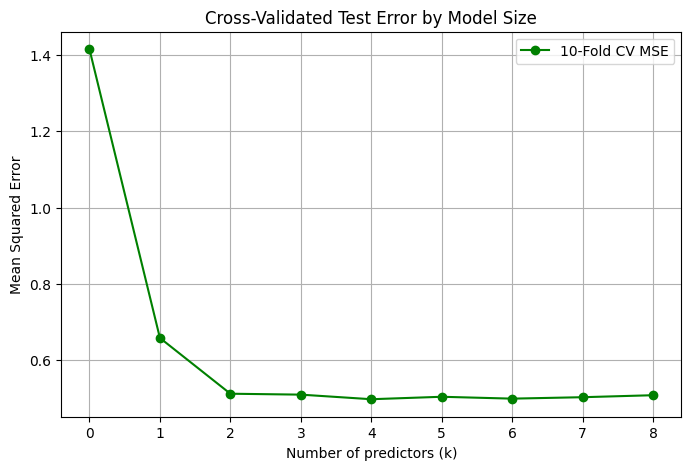

Best k by CV: 4


In [23]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_errors = []

for k in range(9):
    cols, _, _ = best_per_k[k]
    fold_errors = []
    
    for train_idx, test_idx in kf.split(X):
        X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
        y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]
        
        if k == 0:
            y_pred = np.full(len(y_te), y_tr.mean())
        else:
            results = sm.OLS(y_tr, sm.add_constant(X_tr[list(cols)])).fit()
            y_pred = results.predict(sm.add_constant(X_te[list(cols)]))
        
        fold_errors.append(np.mean((y_te - y_pred) ** 2))
    
    cv_errors.append(np.mean(fold_errors))

plt.figure(figsize=(8, 5))
plt.plot(range(9), cv_errors, marker='o', color='green', label='10-Fold CV MSE')
plt.xlabel('Number of predictors (k)')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validated Test Error by Model Size')
plt.xticks(range(9))
plt.legend()
plt.grid(True)
plt.show()

print(f"Best k by CV: {np.argmin(cv_errors)}")

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.

In [ ]:
The cross-validation results confirm what split-validation suggested: the test error decreases sharply from k=0 to k=2, then plateaus with no meaningful improvement for larger models. This consistently points to k=2 with predictors lcp and lpsa as the optimal model.
Looking back at the full-data OLS summary, this choice is further supported by the statistics:

Both lcp and lpsa have p-values of 0.000, confirming they are highly significant predictors of lcavol.
The model achieves an R² of 0.645, meaning it explains about 64.5% of the variance in lcavol with just two predictors.
The intercept is not significant (p=0.657), suggesting the response is well explained by the two predictors alone without a meaningful baseline shift.
The Jarque-Bera test (p=0.831) and low skew suggest residuals are approximately normally distributed, validating OLS assumptions.

Interpretation: lpsa (log PSA level) is the strongest predictor, which is clinically intuitive as PSA is the primary biomarker for prostate cancer volume. lcp (log capsular penetration) adds significant additional explanatory power, reflecting how cancer spread beyond the prostate correlates with its volume.
Overall: Adding predictors beyond k=2 reduces training error but not test error, meaning those extra variables capture noise rather than signal. The k=2 model offers the best bias-variance trade-off — simple, interpretable, statistically sound, and competitive in out-of-sample prediction.